# Python Folgekurs Teil 2: Unser Misère-Spiel als Python Funktionen


<h4><center>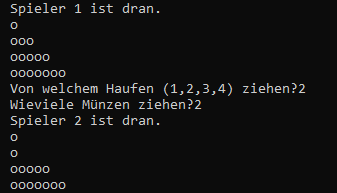</center></h4>
<h4><center>Unser Misère-Spiel wird spielbar!<br>
in diesem Teil schreiben wir das Spiel<br>
für 2 Personen und mit Textausgabe.</center></h4>

## Kapitelübersicht:
* [2.0: Rückblick auf Kurs Teil 1](#chap_0)
* [2.1: Eine Schleife voller Funktionen](#chap_1)
* [2.2: Zeichnen des Spielfeldes](#chap_2)
* [2.3: Eine fehlertolerante Benutzereingabe](#chap_3)
* [2.4: Aktualisieren des Spielfeldes und Gewinnerkennung](#chap_4)
* [2.5: Aus den Funktionen wird unser Spiel!](#chap_5)

 <a class="anchor" id="chap_0"></a>
Im Teil eins von diesem Kurs haben wir Listen, Schleifen und Funktionen kennengelernt, die wir nun anwenden wollen, um das Computerspiel zu schreiben, dass dir bereits im ersten Kurs vorgestellt wurde.

<div class="alert alert-block alert-success">
<p style="color:black;font-size:1.5em;font-weight:bold">📦 Zusammenfassung zur Erinnerung</p>
<font color="black" size="3">    
Listen speichern mehrere Werte in einer Variable. 
    Die Felder einer Liste sind über einen Index erreichbar der bei <b>0</b> startet:
    
<p style="font-family:monospace;font_weight:normal">spielfeld = [1,3,5,7]</p>

mit ***append()*** Können wir Elemente an eine Liste hängen:
        
<p style="font-family:monospace;font_weight:normal">spielfeld.append(0)</p>
        
***For***-Schleifen führen ihren Block für jeden Eintrag in einer Liste einmal aus:
    
<p style="font-family:monospace;font_weight:normal">
    for a in spielfeld: <br>
        &nbsp;&nbsp;&nbsp;&nbsp;print(a)</p>
    
***while***-Schleifen führen ihren Block so lange aus, bis die Bedingung hinter "while" nicht mehr erfüllt ist. ***break*** kann Schleifen an jeder Stelle beenden.
    
<p style="font-family:monospace;font_weight:normal">
while True: <br>
&nbsp;&nbsp;&nbsp;&nbsp;a = input("Bitte 'ende' eingeben") <br>
&nbsp;&nbsp;&nbsp;&nbsp;if a == "ende": <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;break </p>
    
Funktionen erlauben es, eigenen Code als Befehl zu definieren und diesen dann aufzurufen. Dabei können Werte als Parameter an die Funktion übergeben und Werte von der Funktion an den aufrufenden Code zurückgegeben werden.
 
<p style="font-family:monospace;font_weight:normal">    
def addiere_zwei_zahlen(zahl_1, zahl_2): <br>
&nbsp;&nbsp;&nbsp;&nbsp;return( zahl_1 + zahl_2) </p>
</font></div>

**🚀** &nbsp; Hier ist ein Codefeld zum Ausprobieren der Beispiele.

## 2.1. Eine Schleife voller Funktionen <a class="anchor" id="chap_1"></a>

&nbsp;
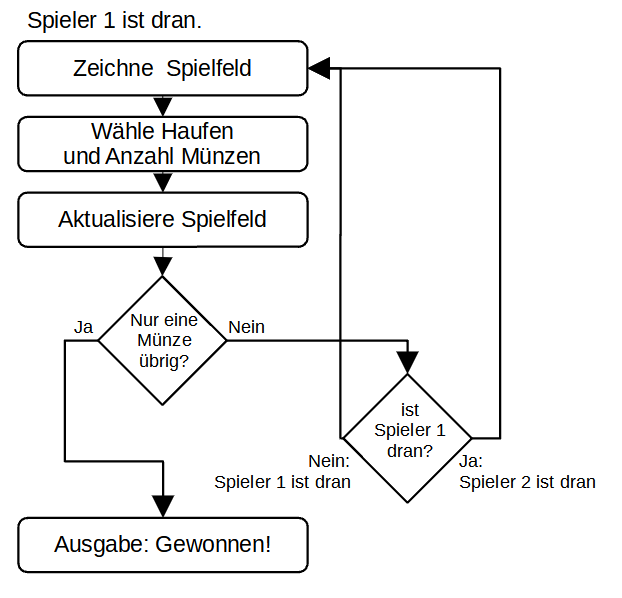

Das UML Diagramm aus dem letzten Teil des Kurses stellt den Spielablauf des Misère-Spiels dar. Wir können dieses Design direkt in die benötigten Funktionen übersetzen. Allerdings müssen wir vorher überlegen, welche Daten zwischen Funktionen ausgetauscht werden soll.

**🚀 &nbsp;Aufgabe 1**: Vervollständige den Code. Überlege dir, welche Daten jede Funktion benötigt und was sie zurückliefern muss.
<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔃 Code zum Wiederherstellen</summary>
    
    aktiver_spieler = "Spieler 1"
    spielfeld = [1,3,5,7]
    while True:
        zeichne_spielfeld( ## was benötigt diese Funktion? )
        # was benötigt spiel_eingabe? Die Funktion wurde schon im Kurs Teil 1 diskutiert.
        spielfeld = aktualisere_spielfeld(## was benötigt diese Funktion?  )
        if spiel_beendet( ## woher weißt die Funktion, wann das Spiel beendet ist? Was muss sie zurückliefern?):
            print(aktiver_spieler + " hat gewonnen.")
            break

        if aktiver_spieler == "Spieler 1":
            aktiver_spieler = "Spieler 2"
        else:
            aktiver_spieler = "Spieler 1"
</details>



In [ ]:
    aktiver_spieler = "Spieler 1"
    spielfeld = [1,3,5,7]
    while True:
        zeichne_spielfeld( ## was benötigt diese Funktion? )
        # was benötigt spiel_eingabe? Die Funktion wurde schon im Kurs Teil 1 diskutiert.
        spielfeld = aktualisere_spielfeld(## was benötigt diese Funktion?  )
        if spiel_beendet( ## woher weißt die Funktion, wann das Spiel beendet ist? Was muss sie zurückliefern?):
            print(aktiver_spieler + " hat gewonnen.")
            break

        if aktiver_spieler == "Spieler 1":
            aktiver_spieler = "Spieler 2"
        else:
            aktiver_spieler = "Spieler 1"

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Was brauchen die Funktionen?</summary>
    
    zeichne_spielfeld() braucht das Spielfeld.
    aktualisiere_spielfeld() benötigt das Spielfeld, sowie welcher_stapel und wie_viele.
    
    spiel_beendet() benötigt das Spielfeld und muss dort schauen, ob nur eine Münze übrig ist. Der Rückgabewert könnte ein Wahrheitswert sein, zur Vereinfachung lassen wir sie aber einen Text ("verloren","gewonnen") zurückgeben, da sowohl bei einer Münze als auch bei 0 Münzen das Spiel beendet ist.
    
</details>

## 2.2 Zeichnen des Spielfeldes<a class="anchor" id="chap_2"></a>

Natürlich können wir einfach die Münzmengen mit ***print()*** ausgeben, schöner ist es aber, für jede Münze ein "o" zu schreiben. Dies machen wir in einer Schleife, die für jeden Stapel einmal ausgeführt wird. Das Ergebnis sieht dann bei Spielbeginn so aus:

***o*** <br>
***ooo*** <br>
***ooooo*** <br>
***ooooooo*** <br>

Da die Schleife für jeden Stapel durchlaufen muss und wir vier Stapel haben, brauchen wir eine verschachtelte Schleife, also eine Schleife innerhalb einer Schleife.

**🚀 &nbsp;Aufgabe 2**: Vervollständige den Code. Wie schaffen wir es, alle Stapel unseres Spielfeldes auszugeben? Tip: ***print("o", end="")*** gibt ein "o" aus, ohne dass danach ein Zeilenumbruch erzeugt wird.
<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔃 Code zum Wiederherstellen</summary>
    
    def zeichne_spielfeld(spielfeld):
        for a in # für jedes Feld in "spielfeld"
            for b in # wiederhole a mal
                print("o", end="")
            print("") # Zeilenumbruch
    spielfeld = [1,3,5,7]
    zeiche_spielfeld(spielfeld) # ausführen zum Testen
</details>

In [ ]:
def zeichne_spielfeld(spielfeld):
    for a in # für jedes Feld in "spielfeld"
        for b in # wiederhole a mal
            print("o", end="")
        print("") # Zeilenumbruch
spielfeld = [1,3,5,7]
zeiche_spielfeld(spielfeld) # ausführen zum Testen

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Wie könnte der Code aussehen?</summary>
    
    def zeichne_spielfeld(spielfeld):
        for a in spielfeld:
            for b in range(a):
                print("o", end="")
            print("") 


    spielfeld = [1,3,5,7]
    zeichne_spielfeld(spielfeld) # ausführen zum Testen
    
</details>

## 2.3. Eine fehlertolerante Benutzereingabe<a class="anchor" id="chap_3"></a>

Wir haben aus dem letzten Kurs schon eine Eingabefunktion, die wir nun erweitern wollen. Hier ist zur Erinnerung der Code.

    def spiel_eingabe(spielfeld):
        while True:
            welcher_stapel = int(input("Von welchem Stapel (1,2,3,4) ziehen?"))
            if welcher_stapel in [1,2,3,4]:
                break
            else:
                print("Bitte gültigen Stapel wählen.")
        while True:
            wie_viele = int(input("Wieviele Münzen ziehen? "))
            if wie_viele > 0 and wie_viele <= spielfeld[welcher_stapel - 1]:
                break
            else:
                print("Bitte gültige Anzahl wählen.")
        return welcher_stapel, wie_viele
        
Diese Funktion macht zwar ihren Job, wir können sie aber verbessern. Beispielsweise erlaubt es die Funktion, einen leeren Stapel  auszuwählen.

<div class="alert alert-block alert-success">
<p style="color:black;font-size:1.5em;font-weight:bold">💡 Gut zu wissen: "Don't repeat yourself" und andere Programmier-Benimmregeln</p>
<font color="black" size="3">
<ul>
<li>Beim Programmieren solltest Du es vermeiden, Code zweimal zu schreiben. Diese Grundregel ist als "Don't repeat yourself" bekannt und besagt, dass drei oder mehr Codezeilen, die sich im Code wiederholen, als Funktion definiert werden sollten.</li>
<br>        
        <li>Funktionen, Schleifen und Codeblöcke sollten nicht zu lang werden. Als Empfehlung gelten zwischen 20 und 30 Zeilen, je nach Sprache. Oft lassen sich Codeblöcke in Unterfunktion aufteilen, so dass der Code lesbarer wird.</li>
<br>
<li>
Viele Codestücke werden selbstklärend, wenn man sie in eine Funktion packt. Ein Funktionsname wie "welche_stapel_haben_muenzen" lässt sofort erkennen, wozu die Funktion da ist.
</li></ul></font>
</div>

Unsere Eingabefunktion soll nun lernen, nur die Stapel mit Münzen zur Auswahl anzubieten. Dazu schreiben wir eine Funktion, die nur die Stapel mit Münzen zurückliefert. 

**🚀 &nbsp; Aufgabe 3**: Vervollständige den Code. Überlege dir, wie eine solche Funktion aussehen könnte und was sie zurückliefert.
<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔃 Code zum Wiederherstellen</summary>
    
    def welche_stapel_haben_muenzen(spielfeld):
            # Wir wollen nur die indexe der Felder zurückliefern, die nicht 0 sind.
            # initialisieren von stapel_mit_muenzen als leere Variable
            for a in range(len(spielfeld)):
                if spielfeld[a] > 0:
                    ## füge der Variable stapel_mit_muenzen a hinzu
            return stapel_mit_muenzen
</details>

In [ ]:
def welche_stapel_haben_muenzen(spielfeld):
        # Wir wollen nur die indexe der Felder zurückliefern, die nicht 0 sind.
        # initialisieren von stapel_mit_muenzen als leere Variable
        for a in range(len(spielfeld)):
            if spielfeld[a] > 0:
                ## füge der Variable stapel_mit_muenzen a hinzu
        return stapel_mit_muenzen

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Wie könnte der Code aussehen?</summary>
    
    def welche_stapel_haben_muenzen(spielfeld):
        stapel_mit_muenzen = []
        for a in range(len(spielfeld)):
            if spielfeld[a] > 0:
                stapel_mit_muenzen.append(a + 1)
        return stapel_mit_muenzen
    
</details>

Mit dieser Funktion können wir nun den Code von oben verbessern. Dazu gibt es hier noch einen Trick: Eine Liste kann man mit ***str()*** in einen String verwandeln, um ihren Inhalt zusammen mit einem Text auszugeben, z.B. 

    print("Spielfeld: " + str(spielfeld))
    
**🚀 &nbsp;Aufgabe 4**: Vervollständige den Code so, dass bei der Auswahl des Stapels die erlaubten Stapel ausgegeben werden, und der Spielende keine Stapel mit 0 Münzen wählen kann. 
<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔃 Code zum Wiederherstellen</summary>
    
    def spiel_eingabe(spielfeld):

        stapel_mit_muenzen = ## hier müssen wir rausfinden, welche Stapel Münzen haben

        while True:
            welcher_stapel = int(input( ## Wie geben wir die erlaubten Eingaben aus? Siehe Trick von oben.
            if ## Nur die Stapel mit Münzen erlauben
                break
            else:
                print("Bitte gültigen Stapel wählen.")
        while True:
            wie_viele = int(input("Wie viele Münzen ziehen?"))
            if wie_viele > 0 and wie_viele <= spielfeld[welcher_stapel - 1]:
                break
            else:
                print("Bitte gültige Anzahl wählen.")
        return welcher_stapel, wie_viele
                                                                 
</details>

In [ ]:
def spiel_eingabe(spielfeld):

    stapel_mit_muenzen = ## hier müssen wir rausfinden, welche Stapel Münzen haben

    while True:
        welcher_stapel = int(input( ## Wie geben wir die erlaubten Eingaben aus? Siehe Trick von oben.
        if ## Nur die Stapel mit Münzen erlauben
            break
        else:
            print("Bitte gültigen Stapel wählen.")
    while True:
        wie_viele = int(input("Wie viele Münzen ziehen?"))
        if wie_viele > 0 and wie_viele <= spielfeld[welcher_stapel - 1]:
            break
        else:
            print("Bitte gültige Anzahl wählen.")
    return welcher_stapel, wie_viele

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Wie könnte der Code aussehen?</summary>
    
        

    def spiel_eingabe(spielfeld):

        stapel_mit_muenzen = welche_stapel_haben_muenzen(spielfeld)

        while True:
            welcher_stapel = int(input("Von welchem Stapel " + str(stapel_mit_muenzen) + " ziehen?"))
            if welcher_stapel in stapel_mit_muenzen:
                break
            else:
                print("Bitte gültigen Stapel wählen.")
        while True:
            wie_viele = int(input("Wie viele Münzen ziehen?"))
            if wie_viele > 0 and wie_viele <= spielfeld[welcher_stapel - 1]:
                break
            else:
                print("Bitte gültige Anzahl wählen.")
        return welcher_stapel, wie_viele
    
</details>

**🚀** &nbsp; Jetzt wo die Eingabe funktioniert können wir sie ausprobieren. Führe die Boxen in den Aufgaben ***3*** und ***4*** aus, um die Funktionen ***spiel_eingabe()*** und ***welche_stapel_haben_muenzen()*** zu definieren. Wenn alles korrekt ist, kannst du die Funktionen nun ausprobieren:

In [ ]:
spielfeld = [1,3,0,7]
welcher_stapel, wie_viele = spiel_eingabe(spielfeld)
print(welcher_stapel, wie_viele)

## 2.4 Aktualisieren des Spielfeldes und Gewinnerkennung <a class="anchor" id="chap_4"></a>

Wir haben jetzt die Spielfeldausgabe und -Eingabe. in unserem UML Diagramm kommt als nächstes die Aktualisierung des Spielfeldes. 

**🚀 &nbsp;Aufgabe 5**: Schreibe die Aktualisierungsfunktion. Überlege dir, welche Parameter sie braucht und was sie zurückliefert.
<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔃 Code zum Wiederherstellen</summary>
    
    def aktualisiere_spielfeld(# was braucht die Funktion noch mal?
        # und was muss die Funktion machen?
        return spielfeld
                                                                 
</details>

In [ ]:
def aktualisiere_spielfeld(# was braucht die Funktion noch mal?
    # und was muss die Funktion machen?
    return spielfeld

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Wie könnte der Code aussehen?</summary>
    
    def aktualisiere_spielfeld(spielfeld, welcher_stapel, wie_viele):
        spielfeld[welcher_stapel - 1] = spielfeld[welcher_stapel - 1] - wie_viele       
        return spielfeld
</details>


Nun brauchen wir noch eine Funktion die erkennt, ob das Spiel beendet ist. Dabei gibt es genau genommen zwei Szenarien: Falls nach einem Zug nur noch eine Münze übrig ist, dann hat der Spieler gewonnen, der dran war. Ist das Spielfeld jedoch nun leer, so hat dieser Spieler verloren.

Wir können den Rückgabewert benutzen, um diese Unterscheidung zu machen: Der Rückgabewert kann ein Text sein, der entweder leer ist, oder die Worte "gewonnen" oder "verloren" annimmt.

<div class="alert alert-block alert-success">
<p style="color:black;font-size:1.5em;font-weight:bold">💡 Gut zu wissen:  Mehrere Returns</p>
<font color="black" size="3">
<ul>
<li>Ein Return-Befehl beendet eine Funktion automatisch. Steht nach dem Return-Befehl weiterer Code, so wird dieser niemals ausgeführt. </li> <br>
<li>In Verbindung mit Bedingungen können mehrere Return-Befehle in einer Funktion dennoch nützlich sein, nämlich dann, wenn je nach Bedingung ein anderer Wert zurückgegeben und die Funktion dann beendet werden soll. </li>
</ul></font></div>
        
        
**🚀 &nbsp;Aufgabe 6**: Schreibe die Funktion zur Spielende-Erkennung. Tipp: Um herauszufinden, ob eine oder keine Münze übrig ist, kannst du den Befehl ***sum()*** verwenden. Dieser liefert die Summe der Zahlen in einer Liste.
<details>
   <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔃 Code zum Wiederherstellen</summary>
    
    def spiel_beendet(spielfeld):
        # je nach dem, wie viele Münzen übrig sind, geben wir "gewonnen", "verloren" oder "" zurück.    
                                                                 
</details>

In [ ]:
def spiel_beendet(spielfeld):
    # je nach dem, wie viele Münzen übrig sind, geben wir "gewonnen", "verloren" oder "" zurück.    

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Wie könnte der Code aussehen?</summary>
    
    def spiel_beendet(spielfeld):
        if sum(spielfeld) == 1:
            return "gewonnen"
        elif sum(spielfeld) == 0:
            return "verloren"
        else:
            return ""
    
</details>

## 2.5 Aus den Funktionen wird unser Spiel <a class="anchor" id="chap_5"></a>

Wir haben nun alle Komponenten für unser Spiel zusammen. Damit es läuft, sollten wir zunächst nacheinander noch einmal alle Funktionen deklarieren. 

**🚀 &nbsp;Aufgabe 7**: Deine Funktionen stehen in den Codefeldern der Aufgaben ***2***, ***3***, ***4*** und ***5*** und ***6***. Führe diese Codefelder noch mal aus.

Zum Ausführen des Spieles brauchen wir nun noch die Schleife von oben. Dort hatten wir überlegt, wie die Schleife aussehen muss und welche Funktionen welche Rückgabewerte hatten. 

**🚀 &nbsp;Aufgabe 8**: Kopiere die Schleife aus dem Codefeld von der ersten Aufgabe und Starte das Spiel.

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Wie sollte der Code nun aussehen?</summary>

    spielfeld = [1,3,5,7]
    aktiver_spieler = "Spieler 1"
    while True:
        print(aktiver_spieler, "ist dran.")
        zeichne_spielfeld(spielfeld)
        welcher_stapel, wie_viele = spiel_eingabe(spielfeld)
        spielfeld = aktualisiere_spielfeld(spielfeld, welcher_stapel, wie_viele)
        if not spiel_beendet(spielfeld) == "":
            print(aktiver_spieler + " hat " + spiel_beendet(spielfeld))
            break
        if aktiver_spieler == "Spieler 1":
            aktiver_spieler = "Spieler 2"
        else:
            aktiver_spieler = "Spieler 1"
    
</details>

Das Spiel ist nun spielbar. Spielt ein paar Runden und prüft dabei, ob sich das Spiel so verhält wie erwartet. Versucht auch einmal, mehr Münzen vom Stapel zu nehmen als da sind oder ungültige Stapel auszuwählen.

Viel Spaß beim Spielen!


p.s. Falls Du das Spiel gar nicht zum Laufen bekommst ist hier noch einmal der gesamte Code. Verwende ihn aber nur, um herauszufinden, warum dein Spiel nicht funktioniert.

<details>
    <summary style="border: 1px solid; border-radius: 3px; padding: 5px; display: inline-block; cursor: pointer; margin-top: 10px; background-color: #EEE9E9;"> 🔎 Gesamter Spielcode für Notfälle</summary>

    def zeichne_spielfeld(spielfeld):
    for a in spielfeld:# für jedes Feld in "spielfeld"
        for b in range(a):# wiederhole a mal
            print("o", end="")
        print("")
    
    def welche_stapel_haben_muenzen(spielfeld):
        stapel_mit_muenzen = []
        for a in range(len(spielfeld)):
            if spielfeld[a] > 0:
                stapel_mit_muenzen.append(a + 1)
        return stapel_mit_muenzen
	
    def spiel_eingabe(spielfeld):

        stapel_mit_muenzen = welche_stapel_haben_muenzen(spielfeld)

        while True:
            welcher_stapel = int(input("Von welchem Stapel " + str(stapel_mit_muenzen) + " ziehen?"))
            if welcher_stapel in stapel_mit_muenzen:
                break
            else:
                print("Bitte gültigen Stapel wählen.")
        while True:
            wie_viele = int(input("Wie viele Münzen ziehen?"))
                if wie_viele > 0 and wie_viele <= spielfeld[welcher_stapel - 1]:
                break
            else:
                print("Bitte gültige Anzahl wählen.")
        return welcher_stapel, wie_viele

    def aktualisiere_spielfeld(spielfeld, welcher_stapel, wie_viele):
        spielfeld[welcher_stapel - 1] = spielfeld[welcher_stapel - 1] - wie_viele       
        return spielfeld

    def spiel_beendet(spielfeld):
        if sum(spielfeld) == 1:
            return "gewonnen"
        elif sum(spielfeld) == 0:
            return "verloren"
        else:
            return ""
		
    spielfeld = [1,3,5,7]
    aktiver_spieler = "Spieler 1"
    while True:
        print(aktiver_spieler, "ist dran.")
        zeichne_spielfeld(spielfeld)
        welcher_stapel, wie_viele = spiel_eingabe(spielfeld)
        spielfeld = aktualisiere_spielfeld(spielfeld, welcher_stapel, wie_viele)
        if not spiel_beendet(spielfeld) == "":
            print(aktiver_spieler + " hat " + spiel_beendet(spielfeld))
            break
        if aktiver_spieler == "Spieler 1":
            aktiver_spieler = "Spieler 2"
        else:
            aktiver_spieler = "Spieler 1"
</details>

---
<font color="#a0a0a0" >Autor: Joachim Kutzera | Version: 15. Mai, 2024 - © 2024 | Lizensiert unter CC BY-NC 4.0
   | codinglabs-projekt.de | infai.org
</font>